In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

In [83]:
# Read csv file
crime_data=pd.read_csv("crime_data.csv")
# convert csv file to dataframe
crime_data_df=pd.DataFrame(crime_data)
# Check to see if data count looks appropriate
# crime_data_df.count()


In [84]:
# Convert "DATE OCC" date to datetime format
crime_data_df['DATE OCC'] = pd.to_datetime(crime_data_df['DATE OCC'])
# crime_data_df

In [85]:
# Remove unecessary columns: DR_NO, AREA, Rpt Dist No, Part 1-2, Crm Cd, Mocodes, Vict Sex, Vict Descent, Premis Cd, Weapon Used Cd, Status, Status Desc, Crm Cd 1, Crm Cd 2, Crm Cd 3, Crm Cd 4, Cross Street
red_crime_data_df=crime_data_df.loc[:,['Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA NAME',
       'Crm Cd Desc','Vict Age','Premis Desc','Weapon Desc', 'LOCATION', 'LAT','LON']]
red_crime_data_df.head(5)
  

,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Premis Desc,Weapon Desc,LOCATION,LAT,LON
0,01/08/2020 12:00:00 AM,2020-01-08,2230,Southwest,BATTERY - SIMPLE ASSAULT,36,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",1100 W 39TH PL,34.0141,-118.2978
1,01/02/2020 12:00:00 AM,2020-01-01,330,Central,BATTERY - SIMPLE ASSAULT,25,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,700 S HILL ST,34.0459,-118.2545
2,04/14/2020 12:00:00 AM,2020-02-13,1200,Central,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,POLICE FACILITY,NaN,200 E 6TH ST,34.0448,-118.2474
3,01/01/2020 12:00:00 AM,2020-01-01,1730,N Hollywood,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,5400 CORTEEN PL,34.1685,-118.4019
4,01/01/2020 12:00:00 AM,2020-01-01,415,Mission,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,BEAUTY SUPPLY STORE,NaN,14400 TITUS ST,34.2198,-118.4468


In [86]:
# Extract data only relating to my assigned region: Hollywood
hollywood_data=red_crime_data_df[(red_crime_data_df["AREA NAME"] == "Hollywood") | (red_crime_data_df["AREA NAME"] == "N Hollywood")]
# hollywood_data.head()


In [87]:
# Identify the top 5 types of crime occurring in Hollywood

# Group the DataFrame by 'Crm Cd Desc' and count the occurrences
hollywood_topcrimes = hollywood_data.groupby('Crm Cd Desc').size()

# Get the top 5 crimes based on the occurrence count
hollywood_total_top5 = hollywood_topcrimes.nlargest(5)
hollywood_total_top5

Crm Cd Desc
VEHICLE - STOLEN                                           6077
BATTERY - SIMPLE ASSAULT                                   5955
BURGLARY FROM VEHICLE                                      5820
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    4980
BURGLARY                                                   4801
dtype: int64

In [88]:
# Creating a DataFrame sorted by the year 2020
hollywood_data["year"] = np.nan
hollywood_data["month"]=np.nan

hollywood_data["year"]= hollywood_data["DATE OCC"].dt.year
hollywood_data_2020 = pd.DataFrame(hollywood_data.loc[hollywood_data["year"] == 2020, :])
hollywood_data_2020["month"]= hollywood_data_2020["DATE OCC"].dt.month
# hollywood_data_2020



In [89]:
# Creating a DataFrame sorted by the year 2021
hollywood_data_2021 = pd.DataFrame(hollywood_data.loc[hollywood_data["year"] == 2021, :])
hollywood_data_2021["month"]= hollywood_data_2021["DATE OCC"].dt.month
# hollywood_data_2021


In [90]:
# Creating a DataFrame sorted by the year 2022
hollywood_data_2022 = pd.DataFrame(hollywood_data.loc[hollywood_data["year"] == 2022, :])
hollywood_data_2022["month"]= hollywood_data_2022["DATE OCC"].dt.month
# hollywood_data_2022

In [91]:
# Creating a DataFrame sorted by the year 2023
hollywood_data_2023 = pd.DataFrame(hollywood_data.loc[hollywood_data["year"] == 2023, :])
hollywood_data_2023["month"]= hollywood_data_2023["DATE OCC"].dt.month
# hollywood_data_2023

In [92]:
# Create DataFrame for top 5 crimes in 2020
# Group the DataFrame by 'Crm Cd Desc' and count the occurrences
crime_counts_2020 = hollywood_data_2020.groupby('Crm Cd Desc').size()

# Get the top 5 crimes based on the occurrence count
top5_2020crimes = crime_counts_2020.nlargest(5)
top5_2020crimes


Crm Cd Desc
VEHICLE - STOLEN                                           1701
BATTERY - SIMPLE ASSAULT                                   1628
BURGLARY FROM VEHICLE                                      1509
BURGLARY                                                   1414
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    1406
dtype: int64

In [93]:
# Create DataFrame for top 5 crimes in 2021
# Group the DataFrame by 'Crm Cd Desc' and count the occurrences
crime_counts_2021 = hollywood_data_2021.groupby('Crm Cd Desc').size()

# Get the top 5 crimes based on the occurrence count
top5_2021crimes = crime_counts_2021.nlargest(5)
top5_2021crimes


Crm Cd Desc
BURGLARY FROM VEHICLE                                      1976
VEHICLE - STOLEN                                           1923
BATTERY - SIMPLE ASSAULT                                   1801
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    1553
THEFT PLAIN - PETTY ($950 & UNDER)                         1541
dtype: int64

In [94]:
# Create DataFrame for top 5 crimes in 2022
# Group the DataFrame by 'Crm Cd Desc' and count the occurrences
crime_counts_2022 = hollywood_data_2022.groupby('Crm Cd Desc').size()

# Get the top 5 crimes based on the occurrence count
top5_2022crimes = crime_counts_2022.nlargest(5)
top5_2022crimes

Crm Cd Desc
BATTERY - SIMPLE ASSAULT                                   1942
VEHICLE - STOLEN                                           1903
BURGLARY FROM VEHICLE                                      1860
THEFT OF IDENTITY                                          1709
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    1557
dtype: int64

In [95]:
# Create DataFrame for top 5 crimes in 2023
# Group the DataFrame by 'Crm Cd Desc' and count the occurrences
crime_counts_2023 = hollywood_data_2023.groupby('Crm Cd Desc').size()

# Get the top 5 crimes based on the occurrence count
top5_2023crimes = crime_counts_2023.nlargest(5)
top5_2023crimes

Crm Cd Desc
BATTERY - SIMPLE ASSAULT                                   584
VEHICLE - STOLEN                                           550
BURGLARY                                                   479
BURGLARY FROM VEHICLE                                      475
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    464
dtype: int64

Top 5 Crimes vs Years:
                                                    2020  2021  2022
VEHICLE - STOLEN                                    1701  1923  1903
BATTERY - SIMPLE ASSAULT                            1628  1801  1942
BURGLARY FROM VEHICLE                               1509  1976  1860
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VAN...  1406  1553  1557
BURGLARY                                            1414  1400  1508




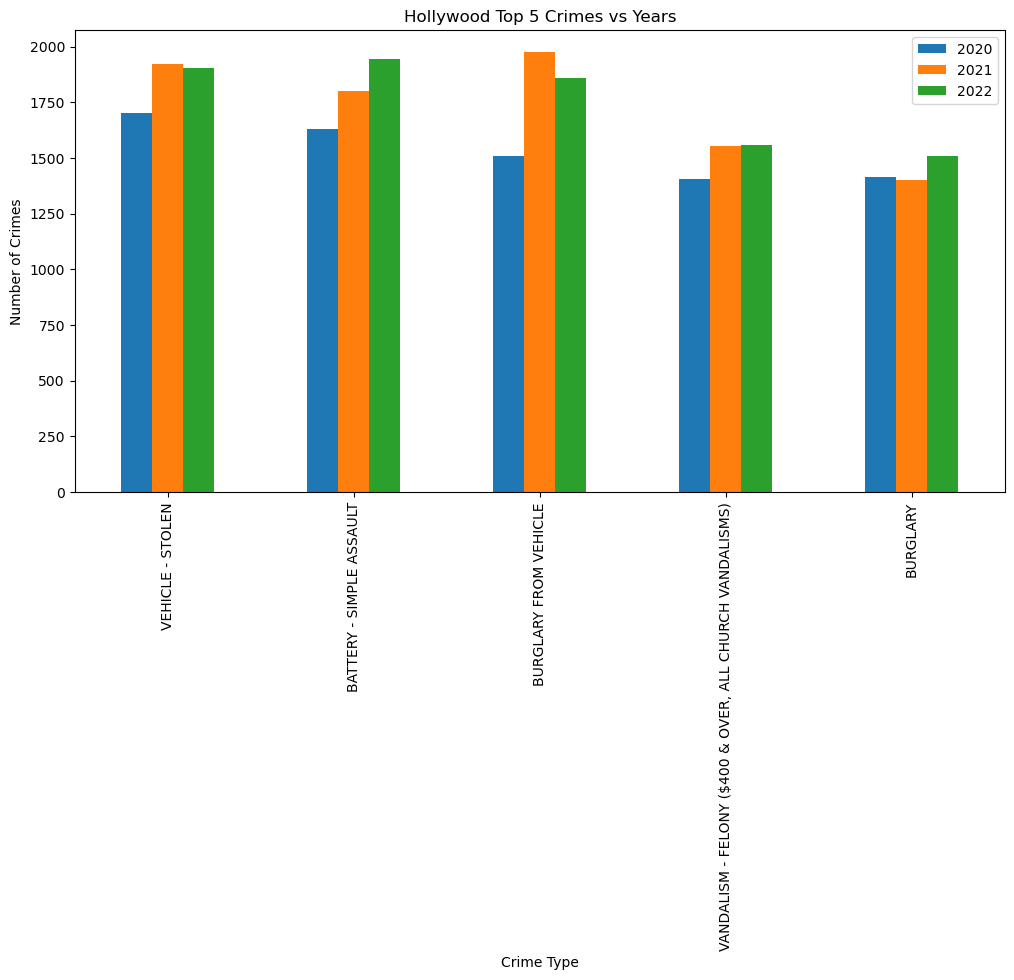

In [96]:
# Top 5 crimes vs years (Bar Chart)
top_5_crimes_overall = hollywood_data["Crm Cd Desc"].value_counts().head(5).index.tolist()
# Create a DataFrame for each year
years = [2020, 2021, 2022]
data_by_year = {year: hollywood_data[hollywood_data["DATE OCC"].dt.year == year] for year in years}

# Calculate the number of top 5 crimes by year
crime_counts_by_year = {}
for year, crimes in data_by_year.items():
    crime_counts_by_year[year] = crimes["Crm Cd Desc"].value_counts().loc[top_5_crimes_overall]

# Print the table for the bar chart
print("Top 5 Crimes vs Years:")
print(pd.DataFrame(crime_counts_by_year))
print("\n")

# Plot the bar chart
yearly_crime_counts_df = pd.DataFrame(crime_counts_by_year)
yearly_crime_counts_df.plot(kind="bar", figsize=(12, 6))
plt.title("Hollywood Top 5 Crimes vs Years")
plt.xlabel("Crime Type")
plt.ylabel("Number of Crimes")
plt.show()


Top 5 Crimes During Socioeconomic Events:
                                                    Pre-COVID  During COVID  \
VEHICLE - STOLEN                                          207          3417   
BATTERY - SIMPLE ASSAULT                                  317          3112   
BURGLARY FROM VEHICLE                                     328          3157   
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VAN...        211          2748   
BURGLARY                                                  190          2624   

                                                    Post-COVID  \
VEHICLE - STOLEN                                          2453   
BATTERY - SIMPLE ASSAULT                                  2526   
BURGLARY FROM VEHICLE                                     2335   
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VAN...        2021   
BURGLARY                                                  1987   

                                                    During Inflation  \
VEHICLE - STOL

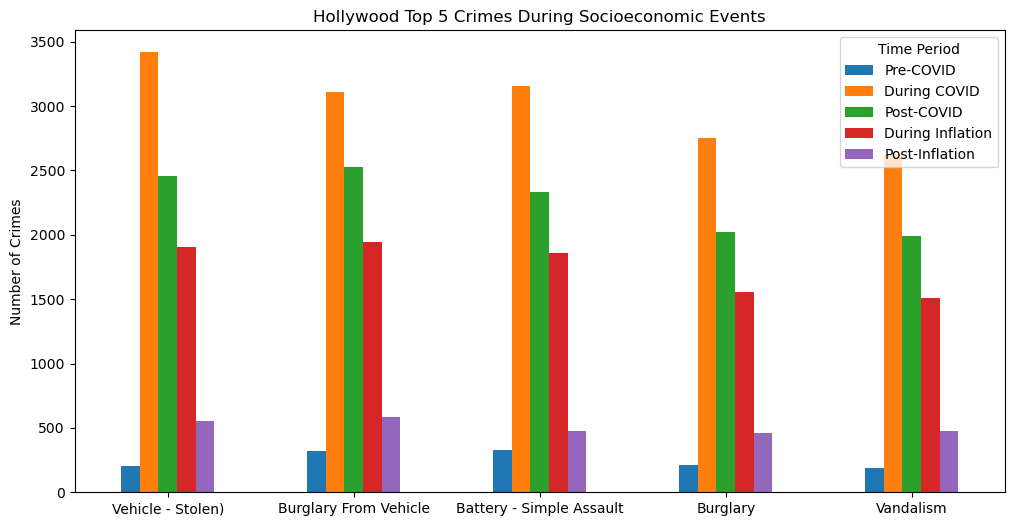

In [97]:
# Compare crimes occurring during socioeconomic events
top_5_crimes = top_5_crimes_overall

pre_covid_period = (hollywood_data["DATE OCC"] < "2020-03-01")
during_covid_period = (hollywood_data["DATE OCC"] >= "2020-03-01") & (hollywood_data["DATE OCC"] <= "2021-12-31")
post_covid_period = (hollywood_data["DATE OCC"] > "2021-12-31")

# Adjust the inflation periods if needed
during_inflation_period = (hollywood_data["DATE OCC"] >= "2022-01-01") & (hollywood_data["DATE OCC"] <= "2022-12-31")
post_inflation_period = (hollywood_data["DATE OCC"] > "2022-12-31")

pre_covid_crime_counts = hollywood_data[pre_covid_period]["Crm Cd Desc"].value_counts().loc[top_5_crimes]
during_covid_crime_counts = hollywood_data[during_covid_period]["Crm Cd Desc"].value_counts().loc[top_5_crimes]
post_covid_crime_counts = hollywood_data[post_covid_period]["Crm Cd Desc"].value_counts().loc[top_5_crimes]

during_inflation_crime_counts = hollywood_data[during_inflation_period]["Crm Cd Desc"].value_counts().loc[top_5_crimes]
post_inflation_crime_counts = hollywood_data[post_inflation_period]["Crm Cd Desc"].value_counts().loc[top_5_crimes]


crime_counts_by_period = pd.DataFrame({
    "Pre-COVID": pre_covid_crime_counts,
    "During COVID": during_covid_crime_counts,
    "Post-COVID": post_covid_crime_counts,
    "During Inflation": during_inflation_crime_counts,
    "Post-Inflation": post_inflation_crime_counts
})


# Print the table for the bar chart
print("Top 5 Crimes During Socioeconomic Events:")
print(crime_counts_by_period)
print("\n")


ax = crime_counts_by_period.plot.bar(rot=0, figsize=(12, 6))
ax.set_ylabel("Number of Crimes")
ax.set_title("Hollywood Top 5 Crimes During Socioeconomic Events")
plt.xticks(range(len(top_5_crimes)), top_5_crimes)
plt.legend(title="Time Period")

x_tick_labels = {'Vehicle - Stolen)','Battery - Simple Assault','Burglary From Vehicle', 'Vandalism', 'Burglary'}
plt.gca().set_xticklabels(x_tick_labels)


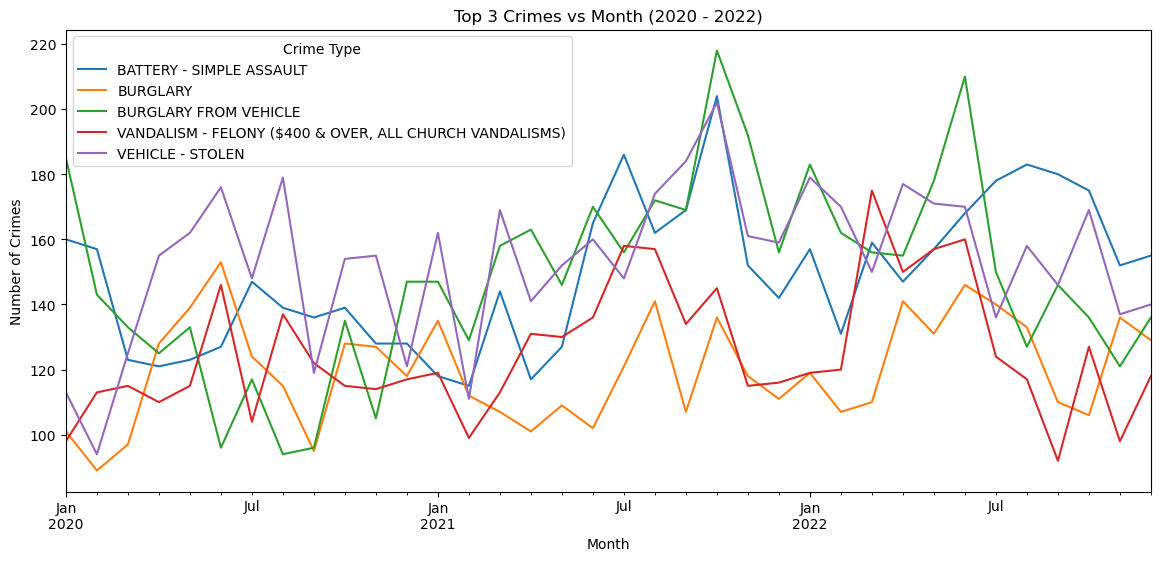

In [98]:
# Top 5 crimes vs month (Line chart)
top_5_crimes_overall = hollywood_data["Crm Cd Desc"].value_counts().head(5).index.tolist()
top_5_crimes_data = hollywood_data[hollywood_data["Crm Cd Desc"].isin(top_5_crimes_overall)]

# Create a year column and sort to remove "2023" for plotting
top_5_crimes_data["year"]=np.nan
top_5_crimes_data["year"]= top_5_crimes_data["DATE OCC"].dt.year

top_5_crimes_data_year = pd.DataFrame(top_5_crimes_data.loc[top_5_crimes_data["year"] != 2023, :])
top_5_crimes_data_year

crimes_by_month = top_5_crimes_data_year.groupby([top_5_crimes_data["DATE OCC"].dt.to_period("M"), "Crm Cd Desc"]).size().unstack().fillna(0)

# Plot the line chart
fig, ax = plt.subplots(figsize=(14, 6))
crimes_by_month.plot(ax=ax)
plt.title("Top 3 Crimes vs Month (2020 - 2022)")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.legend(title="Crime Type")
plt.show()

In [99]:
# Create dataframe containing only the overall top 5 crimes occurring in Hollywood
top5_dataframe=hollywood_data[(hollywood_data["Crm Cd Desc"] == "VEHICLE - STOLEN") | (hollywood_data["Crm Cd Desc"] == "BATTERY - SIMPLE ASSAULT") | (hollywood_data["Crm Cd Desc"] == "BURGLARY FROM VEHICLE") | (hollywood_data["Crm Cd Desc"] == "VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)") | (hollywood_data["Crm Cd Desc"] == "BURGLARY")]
# top5_dataframe


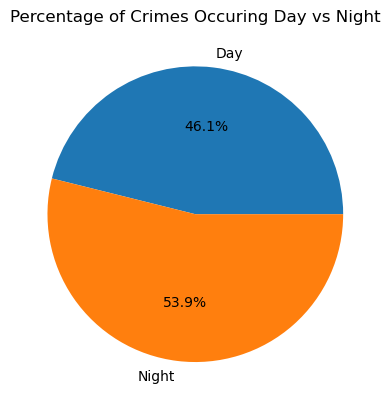

In [100]:
# Compare crimes occuring day vs night
# Function to determine if a time value is within the day/night range
def is_day(time):
    time_str = str(time).zfill(4)  # Convert to string and pad with leading zeros
    return (time_str >= '0600') and (time_str <= '1759')

def is_night(time):
    time_str = str(time).zfill(4)  # Convert to string and pad with leading zeros
    return (time_str >= '1800') or (time_str <= '0559')


# Sort the data into "day" and "night" columns
top5_dataframe['day'] = top5_dataframe['TIME OCC'].apply(is_day)
top5_dataframe['night'] = top5_dataframe['TIME OCC'].apply(is_night)


# Calculate the percentage of crimes during the day and night
day_percentage = top5_dataframe[top5_dataframe['day']].shape[0] / top5_dataframe.shape[0] * 100
night_percentage = top5_dataframe[top5_dataframe['night']].shape[0] / top5_dataframe.shape[0] * 100

# Create a pie chart for the percentage of crimes during day/night
plt.pie([day_percentage, 100 - day_percentage], labels=['Day', 'Night'], autopct='%1.1f%%')
plt.title('Percentage of Crimes Occuring Day vs Night')
plt.show()


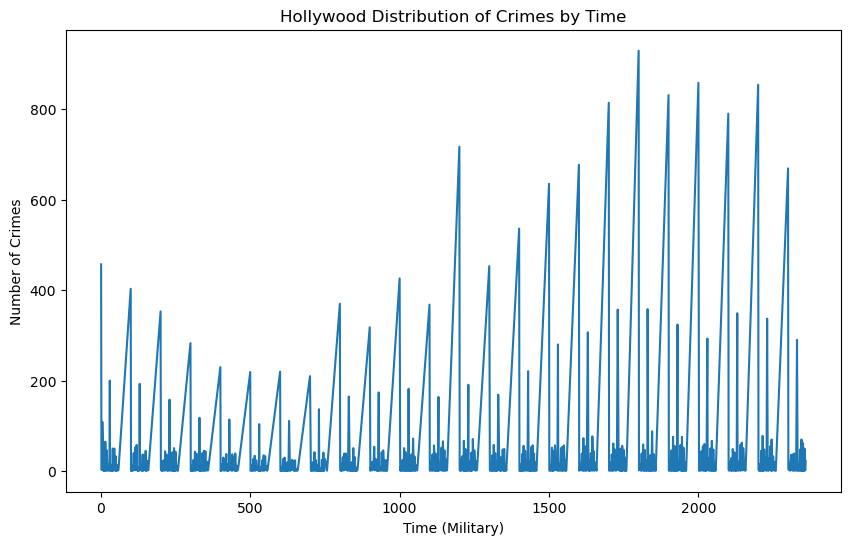

In [111]:
# Analyze peak crime occurance based on hour of the day

# Sort by value counts
time_counts=top5_dataframe['TIME OCC'].value_counts()
sorted_time_counts=time_counts.sort_index()

#Group by hour for plotting
hourly_crime_counts = top5_dataframe.groupby('Hour').size()

# Plot line graph
sorted_time_counts.plot(kind='line', figsize=(10, 6))
plt.xlabel('Time (Military)')
plt.ylabel('Number of Crimes')
plt.title('Hollywood Distribution of Crimes by Time')
plt.show()

In [101]:
# Generate sum of each top 5 crime occurance
value_counts = top5_dataframe['Crm Cd Desc'].value_counts()

# Check the count for 'burglary'
stolen_vehicle_count=value_counts.get('VEHICLE - STOLEN', 0)
battery_count=value_counts.get('BATTERY - SIMPLE ASSAULT', 0)
vehicle_burglary_count=value_counts.get('BURGLARY FROM VEHICLE', 0)
vandalism_count=value_counts.get('VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)', 0)
burglary_count = value_counts.get('BURGLARY', 0)

# Create DataFrame
top5_count_df=pd.DataFrame({
    "Stolen Vehicle": stolen_vehicle_count,
    "Battery - Simple Assault": battery_count,
    "Burglary From Vehicle": vehicle_burglary_count,
    "Vandalism": vandalism_count,
    "Burglary": burglary_count},
    index=['Count'])
top5_count_df

,Stolen Vehicle,Battery - Simple Assault,Burglary From Vehicle,Vandalism,Burglary
Count,6077,5955,5820,4980,4801


In [102]:

# Group the data by year and calculate the counts for each crime category
grouped_counts = top5_dataframe.groupby('year')['Crm Cd Desc'].value_counts()

# Retrieve the counts for each crime category and year
stolen_vehicle_count = grouped_counts.loc[:, 'VEHICLE - STOLEN'].fillna(0)
battery_count = grouped_counts.loc[:, 'BATTERY - SIMPLE ASSAULT'].fillna(0)
vehicle_burglary_count = grouped_counts.loc[:, 'BURGLARY FROM VEHICLE'].fillna(0)
vandalism_count = grouped_counts.loc[:, 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)'].fillna(0)
burglary_count = grouped_counts.loc[:, 'BURGLARY'].fillna(0)

# Create the DataFrame with counts by year
top5_count_df = pd.DataFrame({
    "Stolen Vehicle": stolen_vehicle_count,
    "Battery - Simple Assault": battery_count,
    "Burglary From Vehicle": vehicle_burglary_count,
    "Vandalism": vandalism_count,
    "Burglary": burglary_count
})

# Print the DataFrame
print(top5_count_df)


      Stolen Vehicle  Battery - Simple Assault  Burglary From Vehicle  \
year                                                                    
2020            1701                      1628                   1509   
2021            1923                      1801                   1976   
2022            1903                      1942                   1860   
2023             550                       584                    475   

      Vandalism  Burglary  
year                       
2020       1406      1414  
2021       1553      1400  
2022       1557      1508  
2023        464       479  


<function matplotlib.pyplot.show(close=None, block=None)>

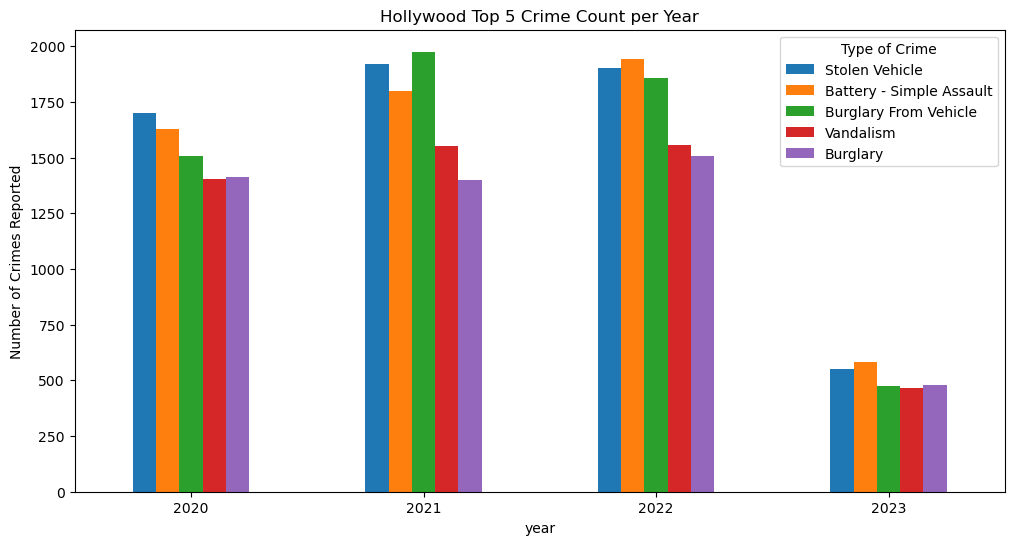

In [103]:
# Plot counts for alternative bar graph

ax = top5_count_df.plot.bar(rot=0, figsize=(12, 6))
ax.set_ylabel("Number of Crimes Reported")
ax.set_title("Hollywood Top 5 Crime Count per Year")
plt.legend(title="Type of Crime")

plt.show

In [113]:
# Find the rate of the top 5 most committed/reported crimes

top_5_crimes = hollywood_data["Crm Cd Desc"].value_counts().head(5).index.tolist()

# Calculate the total count of all crimes
total_count = len(hollywood_data)

# Calculate the count of each top 3 crime
top_5_counts = hollywood_data[hollywood_data["Crm Cd Desc"].isin(top_5_crimes)].groupby("Crm Cd Desc").size()

# Calculate the percentage for each top 3 crime
top_5_percentages = (top_5_counts / total_count) * 100

# Print the percentages
for crime, percentage in top_5_percentages.items():
    print(f"{crime}: {percentage:.2f}%")

BATTERY - SIMPLE ASSAULT: 8.07%
BURGLARY: 6.51%
BURGLARY FROM VEHICLE: 7.89%
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS): 6.75%
VEHICLE - STOLEN: 8.24%
